# LAB: Ensambles para clasificación de dígitos

## INTRODUCCION

Vamos a utilizar un dataset de `sklearn` para realizar una clasificación de imágenes de dígitos manuscritos. El objetivo es lograr clasificar a qué dígito pertenece cada una de las imágenes.

Para eso vamos a usar los modelos vistos y algunas versiones más similares.

Veamos brevemente la estructura de los datos. Básicamente 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target_names.shape

(10,)

In [6]:
digits.target.shape

(1797,)

In [7]:
digits.images[0:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Visualizemos algunos registros del dataset.

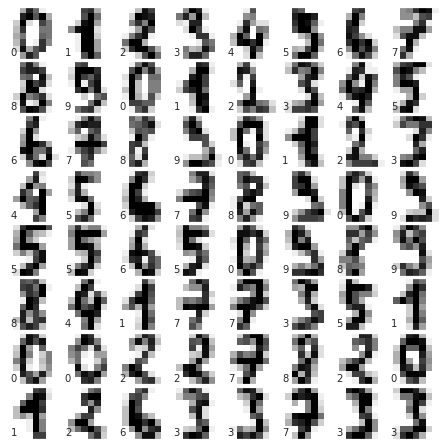

In [11]:
# Generamos los gráficos
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Ploteamos los dígitos: cada imagen es de 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # etiquetamos la imagen con el target value
    ax.text(0, 7, str(digits.target[i]))

## Random Forest

Podemos usar un clasificador de dígitos muy rápidamente utilizando un Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



Veamos el reporte de clasificación:

In [ ]:
from sklearn import metrics


Y para evaluarlo, podemos usar la matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix


Es interesante ver cómo un clasificador basado en Random Forest (sin ningún tipo de tuneo) resulta en una muy precisa clasisicación de los datos de dígitos.

## Extra Tree 

Extra Trees es un algoritmo similar al Random Forest, construye múltiples árboles y separa los nodos usando subsets de features aleatorio, pero con dos diferencias claves:  no hace un bootstrap de las observaciones (muestreo sin reemplazo), y los nodos se separando de forma aleatoria, no con la mejor separación (en relación al criterio). Entonces, en resumen:
- se construyen mcuhos árboles con  bootstrap = False por default
- los nodos se separan de forma aleatoria para cada subset de features elegidos al azar en cada nodoode


El nombre ExtraTrees viene Extremely Randomized Trees.
https://medium.com/@namanbhandari/extratreesclassifier-8e7fc0502c7

Probemos ahora un Extra Tree.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=1000, class_weight='balanced')

In [ ]:
et.fit(Xtrain, ytrain)
ypred_et = et.predict(Xtest)

In [ ]:
print(metrics.classification_report(ypred_et, ytest))

In [ ]:
mat = confusion_matrix(ytest, ypred_et)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');

# Boosting 

Boosting es otra estrategia de ensemble que se puede emplear con un amplio grupo de métodos de statistical learning, entre ellos los árboles de predicción. La idea detrás de boosting es ajustar, de forma secuencial, múltiples weak learners (modelos sencillos que predicen solo ligeramente mejor que lo esperado por azar). Cada nuevo modelo emplea información del modelo anterior para aprender de sus errores, mejorando iteración a iteración. En el caso de los árboles de predicción, un weak learners se consigue utilizando árboles con una o pocas ramificaciones. A diferencia del método de bagging, el boosting no hace uso de muestreo repetido (bootstrapping), por lo que cada árbol construido depende en gran medida de los árboles previos. Tres de los algoritmos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting.

## Gradient Boosting

Gradient Boosting es una generalización del algoritmo AdaBoost que permite emplear cualquier función de coste, siempre que esta sea diferenciable. La flexibilidad de este algoritmo ha hecho posible aplicar boosting a multitud de problemas (regresión, clasificación con más de dos clases…). Para cada uno de ellos, el algoritmo de Gradient Boosting es ligeramente distinto, pero, para todos, la idea es la misma: dada una función de coste (por ejemplo, residuos cuadrados para regresión) y un weak learner (por ejemplo, árboles), el algoritmo trata de encontrar el modelo que minimiza la función de coste. Suele iniciarse con la mejor aproximación de la variable respuesta (la media en el caso de regresión), se calculan los residuos y con ellos se ajusta un nuevo weak learner que intente minimizar la función de coste. Este proceso se repite M

veces, de forma que cada nuevo modelo minimiza los residuos (errores) del anterior.

Dado que el objetivo de Gradient Boosting es ir minimizando los residuos iteración a iteración, es susceptible de overfitting. Una forma de evitar este problema es empleando un valor de regularización, también conocido como learning rate (λ
), que limite la influencia de cada modelo en el conjunto del ensemble. Como consecuencia de esta regularización, se necesitan más modelos para formar el ensemble pero se consiguen mejores resultados.

https://medium.com/diogo-menezes-borges/boosting-with-adaboost-and-gradient-boosting-9cbab2a1af81

¿Qué sucede si usamos un GradientBoosting con los parámetros por defecto?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


## AdaBoost

AdaBoost es una contracción de “Adaptive Boosting”, en donde el término Adaptive hace alusión a su principal diferencia con su predecesor (boosting). En términos de funcionalidad son iguales, ambos algoritmos buscan crear un clasificador fuerte cuya base sea la combinación lineal de clasificadores “débiles simples”. Sin embargo, AdaBoost propone entrenar una serie de clasificadores débiles de manera iterativa, de modo que cada nuevo clasificador
o “weak learner ” se enfoque en los datos que fueron erróneamente clasificados por su predecesor, de esta manera el algoritmo se adapta y logra obtener mejores resultados.

El nombre de este meta-algoritmo proviene de la abreviación de adaptive boosting y hace referencia a una estrategia de ponderar de manera diferente a cada uno de los ejemplos, durante el entrenamiento. Aquellos ejemplos que fueron clasificados incorrectamente en una iteración, reciben una ponderación más alta en la siguiente iteración. Por el contrario, los ejemplos que fueron clasificados correctamente en esa iteración, recibirán menos importancia en la siguiente. Esta estrategia permite que AdaBoost se enfoque, iteración tras iteración, en aquellos ejemplos que aún no han sido clasificados correctamente por el ensamble de clasificadores débiles.

Probemos ahora con un AdaBoost con los parámetros por defecto:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

Seguramente podrán ver que AdaBoost parece tener una performance notablemente peor que la de los modelos anteriores. Una posibilidad, entonces, es tratar de tunear los hiperparámetros para buscar mejorar su performance.

Tengan en cuenta que la "arquitectura" de AdaBoost es diferente. Unos de sus parámetros es `base_estimator`. Por defecto, `AdaBoostClassifier` utiliza un árbol de decisión (es decir, `base_estimator=DecisionTreeClassifier()`). Por lo cual deben tener en cuenta este hecho al momento de definir la grilla de parámetros para la búsqueda: hay algunos parámetros que corresponden al `base_estimator` -en este caso, árboles- y otros que corresponden a `AdaBoostClassifier`.

**Pista**: pueden pasar parámetros de cada estimador de forma análoga a cómo los pasan en un pipeline: `{'base_estimator__[parametro_del_base_estimator': [grilla]}`

In [ ]:
params = {"base_estimator__max_depth": [1, 10, 50],
          "base_estimator__min_samples_split": [5, 10, 15], 
          "base_estimator__max_features": [5, 25, 61],
          "base_estimator__min_samples_leaf": [5, 10, 15],
          "n_estimators": [100, 500],
          "learning_rate":[0.01, 0.1, 1.0]
         }

grid_ab = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params, n_iter=1, verbose=1)
grid_ab.fit(Xtrain, ytrain)

## BONUS

Traten de mejorar la performance de Gradient Boosting haciendo un tunning de los parámetros.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier()
param_grid_gb = {'n_estimators':[100, 500, 1000] , 
                 'max_depth': [5, 10, 15], 
                 'min_samples_split': [5, 10, 15],
                 'min_samples_leaf': [5, 10, 15],
                 'learning_rate':[0.001, 0.001, 0.1, 1.0]}
